In [41]:
import numpy as np
import importlib
from models import cgan_model
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels, Point
import copy
import RelativeImportance
import Measure
import Generation


importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)
importlib.reload(Point)
importlib.reload(RelativeImportance)
importlib.reload(Measure)
importlib.reload(Generation)
importlib.reload(cgan_model)

<module 'models.cgan_model' from 'D:\\netSVG\\models\\cgan_model.py'>

In [42]:
import os
dataset_config = config.DatasetConfig(scenario="MLCC", n_instance=1000)

assert(dataset_config.scenario == "PG" 
       or dataset_config.scenario == "PT"
      or dataset_config.scenario == "MLCC"
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/MLCC already exists replacing files in this notebook


In [43]:
file_name_test = "../data/" + dataset_config.scenario+ "/test_data.txt"
X_test,Y_test = dataset.get_functional_test_data(file_name_test)

In [44]:
file_name_train = "../data/" + dataset_config.scenario+ "/train_data.txt"
X_train,Y_train = dataset.get_functional_train_data(file_name_train)

In [45]:
random_seed = 1985
if dataset_config.scenario == "MLCC":
    exp_config = config.Config(
        model=config.ModelConfig(activation="elu", lr_gen=0.0001, lr_disc=0.0005, dec_gen=0, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
        training=config.TrainingConfig(n_epochs=500, batch_size=100, n_samples=50),
        dataset=dataset_config,
        run=config.RunConfig(save_fig=1)
    )  

In [46]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[   516.26598  -5939.44373   3158.6037  -13415.87356  12686.50324
     14.90333      1.26763    -16.96347   1582.86887     22.23489
    731.88739   -824.57838]
normal coefficient: 
120120.5083
Standardized regression coefficient: 
[ 0.0989  -0.656    0.08608 -0.42259  0.37176  0.25209  0.66808 -0.11532
  0.99639  0.12254  0.78234 -0.06253]
normal coefficient: 
0.0


In [47]:
#elif dataset_config.scenario == "MLCC":
     #imp = RelativeImportance.relativeImp_MLCC()
imp = [0.005807103724392776, 0.08056379800289575, 0.027708178275372558, 0.029279516948187895, 0.06921072266530037, 0.1222271387246593, 0.11319916571268794, 0.04157214482892202, 0.12625181040975142, 0.06501790211941245, 0.3118271249994784, 0.0073353935889390945]
#imp = list(imp.values())
print("The importance for every dimension:")
print(imp)

#os.exist(0)

The importance for every dimension:
[0.005807103724392776, 0.08056379800289575, 0.027708178275372558, 0.029279516948187895, 0.06921072266530037, 0.1222271387246593, 0.11319916571268794, 0.04157214482892202, 0.12625181040975142, 0.06501790211941245, 0.3118271249994784, 0.0073353935889390945]


In [48]:
length, max_dist = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
minist dist:
66.461
maxist imp:
0.3118271249994784
The original length of the smaple: 
[ 1.23769 17.17089  5.90556  6.24046 14.75117 26.05077 24.1266   8.86044
 26.90857 13.85753 66.461    1.56342]


In [49]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 2.7 and 3.3in the dimension of No. 0
The value area of x in the sample is between 1.83 and 2.15in the dimension of No. 1
The value area of x in the sample is between 0.92 and 1.0in the dimension of No. 2
The value area of x in the sample is between 0.41 and 0.5in the dimension of No. 3
The value area of x in the sample is between 0.0 and 0.08in the dimension of No. 4
The value area of x in the sample is between 1262.0 and 1307.0in the dimension of No. 5
The value area of x in the sample is between 10232.0 and 11750.0in the dimension of No. 6
The value area of x in the sample is between 22.0 and 41.0in the dimension of No. 7
The value area of x in the sample is between -75.6 and -73.5in the dimension of No. 8
The value area of x in the sample is between 40.4 and 54.0in the dimension of No. 9
The value area of x in the sample is between -9.0 and -5.2in the dimension of No. 10
The value area of x in the sample is between 0.824 and 1.03in the di

In [50]:
n_sample,length = sample.divide_sample2(length, L, 300)

The number of diversions of the 0th dimension is: 1
1
The number of diversions of the 1th dimension is: 1
1
The number of diversions of the 2th dimension is: 1
1
The number of diversions of the 3th dimension is: 1
1
The number of diversions of the 4th dimension is: 1
1
The number of diversions of the 5th dimension is: 2
2
The number of diversions of the 6th dimension is: 63
63
The number of diversions of the 7th dimension is: 3
3
The number of diversions of the 8th dimension is: 1
1
The number of diversions of the 9th dimension is: 1
1
The number of diversions of the 10th dimension is: 1
1
The number of diversions of the 11th dimension is: 1
1
总的样方分割数为：
378
分割数：
[ 1  1  1  1  1  2 63  3  1  1  1  1]
样方的大小：
[ 1.23769 17.17089  5.90556  6.24046 14.75117 26.05077 24.1266   8.86044
 26.90857 13.85753 66.461    1.56342]


In [51]:
dim = len(X_train[0])
gen_x = sample.gen_x_center(dim,length,n_sample, x_min)

第0维度，最小的x为2.7
第0维度的中心值有：
[3.31884]
第1维度，最小的x为1.83
第1维度的中心值有：
[10.41544]
第2维度，最小的x为0.92
第2维度的中心值有：
[3.87278]
第3维度，最小的x为0.41
第3维度的中心值有：
[3.53023]
第4维度，最小的x为0.0
第4维度的中心值有：
[7.37558]
第5维度，最小的x为1262.0
第5维度的中心值有：
[1275.02538, 1301.07616]
第6维度，最小的x为10232.0
第6维度的中心值有：
[10244.0633, 10268.1899, 10292.3165, 10316.4431, 10340.5697, 10364.6963, 10388.8229, 10412.9495, 10437.0761, 10461.2027, 10485.3293, 10509.4559, 10533.5825, 10557.7091, 10581.8357, 10605.9623, 10630.0889, 10654.2155, 10678.3421, 10702.4687, 10726.5953, 10750.7219, 10774.8485, 10798.9751, 10823.1017, 10847.2283, 10871.3549, 10895.4815, 10919.6081, 10943.7347, 10967.8613, 10991.9879, 11016.1145, 11040.2411, 11064.3677, 11088.4943, 11112.6209, 11136.7475, 11160.8741, 11185.0007, 11209.1273, 11233.2539, 11257.3805, 11281.5071, 11305.6337, 11329.7603, 11353.8869, 11378.0135, 11402.1401, 11426.2667, 11450.3933, 11474.5199, 11498.6465, 11522.7731, 11546.8997, 11571.0263, 11595.1529, 11619.2795, 11643.4061, 11667.5327, 11691.6593, 11715.

In [52]:
gen_sample_point = sample.gen_product2(gen_x)
print("样方中心点：")
gen_sample_point = np.array(gen_sample_point)
#print(gen_sample_point)

样方中心点：


In [53]:
xlimit = []
for index in range(len(n_sample)):
    l = []
    for i in range(n_sample[index]):
        x = x_min[index] + i * length[index]
        l.append(x)
    l.append(x_min[index] + n_sample[index] * length[index])
    xlimit.append(l)
print("over")

over


In [54]:
sample_list = []
xlim_list = []

In [55]:
x_value = []
for index in range(dim):
    xl = []
    for i in range(len(X_train)):
        x = X_train[i][index]
        r = 0
        for xi in xl:
            if xi == x:
                r = 1
        if r == 0:
            xl.append(x)
    x_value.append(xl)
    
x_value_ori = copy.deepcopy(x_value)
print("over")

over


In [56]:
XLim.con_s(gen_sample_point, sample_list, dim, xlimit)
print("over")

over


In [57]:
XLim.con_sample(xlim_list, length, x_min, dim, n_sample)
print("over")

over


In [58]:
XLim.sample_feature(xlim_list, sample_list, x_value)
print("over")

over


In [59]:
XLim.add_xvalue(xlim_list)
#os.exist(0)

In [60]:
x_com, x_add = Generation.get_x_com(X_train, dim, x_value, x_value_ori)

In [61]:
E_dist = Generation.E_dist(x_com)
#os.exist(0)

In [62]:
gen_x = []
discard_list = []
Generation.gen_x_sample2(sample_list, gen_x, dim, x_max, x_min, n_sample, X_train)
#gen_x_cross = sample.gen_product(x_value)
print("over")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [63]:
plot_xlim = copy.deepcopy(xlimit)
for index in range(dim):
    i = len(plot_xlim[index])
    plot_xlim[index][i-1] = x_max[index]
print("over")        

over


In [64]:
gen_x_checked = []
XLim.check2(sample_list, xlim_list, gen_x_checked, discard_list, gen_x)
XLim.sample_attri(sample_list, X_train, gen_x_checked, Y_train)
XLim.xl_attri(xlim_list, X_train, gen_x_checked)
gen_x = np.array(gen_x)

In [65]:
import GPy

noise = 3
length_ = 2
noise_var = exp_config.model.z_input_size
run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=12, variance=noise, lengthscale=length_)
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel, noise_var=noise_var)
if run_hyperopt_search:
    gpr.optimize(messages=True) 
print("over")

over


In [66]:
gen_y_cross, cov_train_cross = gpr.predict(gen_x)
print("over")

over


In [67]:
XLim.add_y(sample_list, gpr)
print("over")

over


In [68]:
point_list = []
Point.con_point(gen_x, gen_y_cross, point_list)
print("over")

over


In [69]:
for sample in sample_list:
    for index in range(len(sample.gen_xlist)):
        for point in point_list:
            r = -1
            for i in range(dim):
                if point.x[i] != sample.gen_xlist[index][i]:
                    r = 0
                    break
            if r == -1:
                sample.points.append(point)
print("over")

over


In [70]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2674
Model:                       QuantReg   Bandwidth:                       1130.
Method:                 Least Squares   Sparsity:                        2219.
Date:                Thu, 08 Oct 2020   No. Observations:                   30
Time:                        01:17:28   Df Residuals:                       17
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6096   5.33e+04  -6.77e-05      1.000   -1.12e+05    1.12e+05
x1            22.2543   1314.964      0.017      0.987   -2752.077    2796.585
x2           -20.1152   1.17e+04     -0.002      0.999   -2.47e+04    2.47e+04
x3           -16.5042   4.43e+04     -0.000      1.0

In [71]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))
print("over")

 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	-8.3293	[-250.8779  -76.3174  -15.3942   -9.2438    9.0031   43.6684    0.7776
  -57.9675  505.7426  -23.084  1001.7626   40.9309]
0.15	-20.1173	[ 364.6409 -575.1031  -60.3284  149.4598   66.992    35.0165    0.1079
  -17.3784  364.6839   45.9394  581.699   142.9456]
0.25	-7.0691	[ 675.9382 -256.0401 -117.433    15.3616   -9.4904   33.0162   -0.0053
   -9.455   351.6979   65.4675  523.2488   38.8887]
0.35	5.8701	[1089.4738  -69.284   -28.9183   -1.6966  -15.2844   31.5324    0.0719
  -11.6043  350.3705   63.7747  508.7335 -614.1965]
0.45	-29.6981	[1480.6061 -837.3872 -393.2662 -102.7675   20.254    30.3312    0.0565
  -18.1513  306.327    37.6556  452.9546 -244.5425]
0.55	-16.8948	[ 405.7303 -732.8405   -1.6212  192.037    18.2629   16.6058   -0.1758
  -41.4982  -52.8077  -36.6419  466.3194  360.2824]
0.65	12.9909	[ 384.4304 -868.216   193.0321  350.5129  100.4469   11.6483    0.5302
   27.0709   26.6861  -38.5954  139.0486 1073.7271]
0.75	13.6509	[ -96.3742 -257.8379   32.5367   

In [72]:
y_quantile = [15676.750,16559.600,16657.000,17030.200,17143.350,17286.050,17342.350,17843.250,18193.950,18403.250]

In [73]:

for xv in x_value:
    xv.sort()
for xv in x_value_ori:
    xv.sort()
print("over")

over


In [74]:
vir_xpoint = []
vir_ypoint = []
del_list = []
QRselection.qr_selection2(xlim_list, models, vir_xpoint, vir_ypoint, y_quantile, ols, x_value_ori,
                 n_sample, X_train, Y_train, sample_list, point_list, x_value)
print("over")

over


In [75]:
i = 0
for point in point_list:
    if point.checked == 1:
        i += 1
print("over")

over


In [76]:
from hpelm import ELM
elm_old = ELM(12, 1)
elm_old.add_neurons(51, "sigm")
#elm.add_neurons(10, "rbf_l2")
elm_old.train(X_train, Y_train, "LOO")
y_predict_old = elm_old.predict(X_test)

elm_new = ELM(12, 1)
elm_new.add_neurons(51, "sigm")
#elm.add_neurons(10, "rbf_l2")
add_x_train = dataset.add_train(X_train, np.array(vir_xpoint))
add_y_train = dataset.add_train(Y_train, np.array(vir_ypoint))
elm_new.train(np.array(vir_xpoint), np.array(vir_ypoint), "LOO")
y_predict_new = elm_new.predict(X_test)

test_list = []
for i in range(len(X_test)):
    test_point = Point.TestPoint(X_test[i], Y_test[i], y_predict_old[i], y_predict_new[i])
    test_list.append(test_point)
print("over")

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
over


 D:\CondaEnv\netSVGpython36\lib\site-packages\hpelm\nnets\slfn.py:62: RuntimeWarning:overflow encountered in exp
 D:\CondaEnv\netSVGpython36\lib\site-packages\hpelm\nnets\slfn_python.py:65: FutureWarning:`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


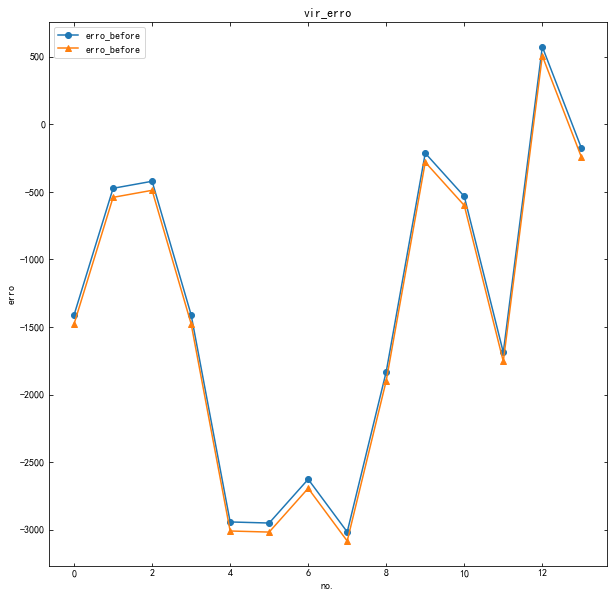

In [77]:
plotting.plot_erro2(test_list, exp_config, fig_dir, "vir_erro")

In [78]:
mae_old, mae_new = Measure.mae2(test_list)
mse_old, mse_new = Measure.mse2(test_list)
mape_old, mape_new = Measure.mape2(test_list)
print(" all test point")
print(mae_old)
print(mae_new)
print(mse_old)
print(mse_new)
print(mape_old)
print(mape_new)

 all test point
[1447.37142857]
[1504.74435799]
[3187499.33063494]
[3374770.42675568]
[0.07486223]
[0.07790413]


In [79]:

np.savetxt("../figures/MLCC/vx_data.txt", np.array(vir_xpoint),fmt='%.8f',delimiter=' ')

In [80]:
np.savetxt("../figures/MLCC/vy_data.txt", np.array(vir_ypoint),fmt='%.8f',delimiter=' ')
